In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.manifold import TSNE

customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

data = pd.merge(customers_df, transactions_df, on='CustomerID')


data_selected = data[features]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)



Davies-Bouldin Index: 0.8846494499319848
Silhouette Score: 0.4826747377951521


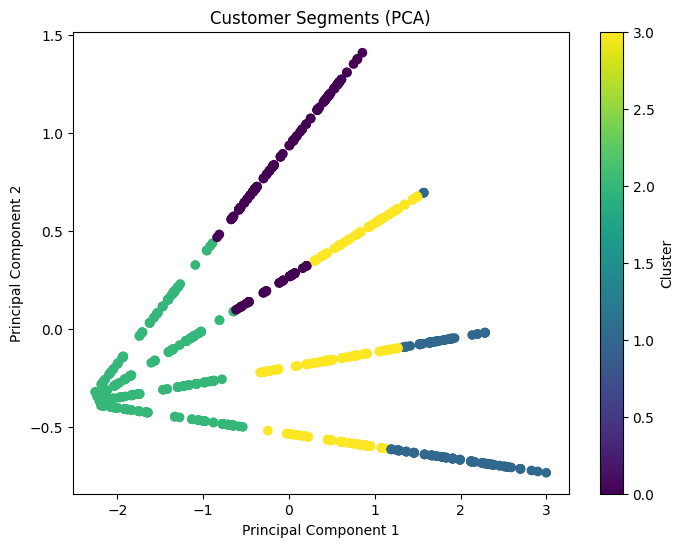

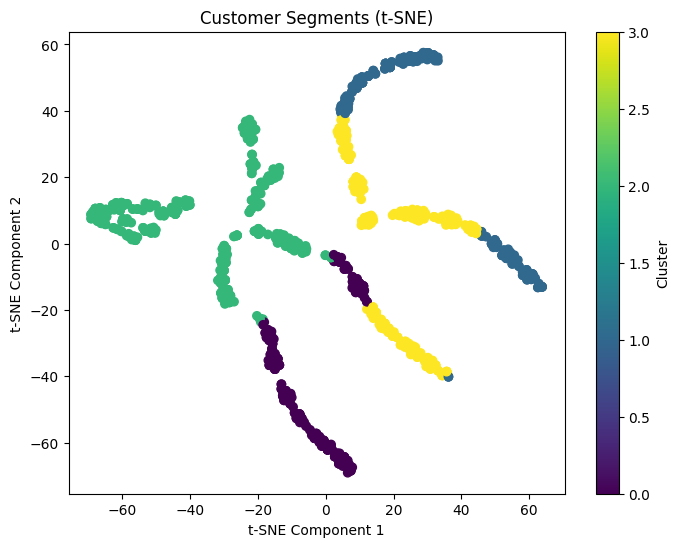

In [7]:
#
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
silhouette = silhouette_score(data_scaled, data['Cluster'])


print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot PCA result
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot t-SNE result
plt.figure(figsize=(8,6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Save the clustering results to a CSV file
data[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation_Results.csv', index=False)
